In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, autojit, prange
from skimage import exposure
# Disable inline plots
#%matplotlib qt

In [3]:
q = np.load('gaussian window function.npy')
data = np.load('PMN_normdata_48sym_300K.npy')

In [4]:
dreg = 1*np.isfinite(data) # Region containing detector coverage has voxels set to 1
dreg = np.multiply(q, dreg) # Multiply by window function

In [5]:
# Does a 1D ft, doesn't need to be rolled over
@jit
def ft(signal):
    return np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(signal)))
# Fourier transform 2D slices of an image
@jit
def ft_slices(data):
    shape = np.shape(data) # Get shape of input data
    fslices = np.zeros(shape, dtype = np.complex_) # Array of complex zeros with same shape as input data
    l1 = shape[0] # Number of 2D slices through 3D volume
    for i in range (0, l1):
        fslices[i] = ft(data[i]) # Assign FT of individual slices to corresponding slice in zero array
        #print(i, end = ' ') # Testing counter printout
    return fslices
# Take FT of columns through 2D slices
@jit
def ft_columns(data):
    shape = np.shape(data) # Get shape of input data
    out = np.zeros(shape, dtype = np.complex_) # Array of complex zeros with same shape as input data
    l1 = shape[0] # Total number of loops for y dim
    l2 = shape[1] # Total number of loops for z dim
    for i in range (0, l1): # Loop through y
        for j in range (0, l2): # Loop through z
            out[:, i, j] = ft(data[:, i, j]) # Assign FT through x axis to corresponding region of zero array
        #print (i, end = ' ') # Testing counter printout
    return out
# Take 3D FT by taking FT of 2D slices through an image and then 1D columns perpendicular to slices
@jit
def ft_3d(data):
    slices = ft_slices(data)
    cols = ft_columns(slices)
    return cols

In [6]:
test = ft_3d(dreg)

In [7]:
mask = np.ones((501,501, 501))
mask[248:253, 248:253, 248:253] = 0

test = np.multiply(test, mask)

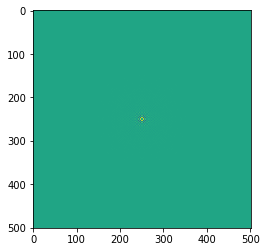

In [12]:
plt.imshow(np.real(test[250]))
plt.show()

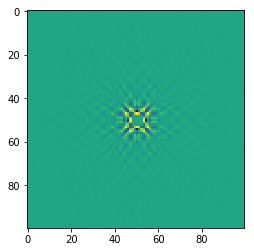

In [13]:
plt.imshow(np.real(test[250])[200:300,200:300])
plt.show()